### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
data = pd.read_csv(file_to_load)

In [2]:
print(data)

     Purchase ID             SN  Age  Gender  Item ID  \
0              0        Lisim78   20    Male      108   
1              1    Lisovynya38   40    Male      143   
2              2     Ithergue48   24    Male       92   
3              3  Chamassasya86   24    Male      100   
4              4      Iskosia90   23    Male      131   
..           ...            ...  ...     ...      ...   
775          775     Aethedru70   21  Female       60   
776          776         Iral74   21    Male      164   
777          777     Yathecal72   20    Male       67   
778          778        Sisur91    7    Male       92   
779          779      Ennrian78   24    Male       50   

                                     Item Name  Price  
0    Extraction, Quickblade Of Trembling Hands   3.53  
1                            Frenzied Scimitar   1.56  
2                                 Final Critic   4.88  
3                                  Blindscythe   3.27  
4                                  

## Player Count

* Display the total number of players


In [3]:
Players = pd.DataFrame({"Total Players": [data["Purchase ID"].count()]})
Players

,Total Players
0,780


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [4]:
unique_items = len(data["Item ID"].unique())
average_price = data["Price"].mean()
purchases = data["Purchase ID"].count()
revenue = data["Price"].sum()
basic_stats = {"Total Items": [unique_items], "Avg Price": [average_price], "Num. of Purchases": [purchases], "Revenue": [revenue]}
basic_stats_df = pd.DataFrame(basic_stats)
basic_stats_df = basic_stats_df.round(2)
basic_stats_df

,Total Items,Avg Price,Num. of Purchases,Revenue
0,179,3.05,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [5]:
# My first Attempt  
# gender = data["Gender"].values.tolist()
# percent_male = gender.count("Male")/len(gender)*100
# percent_female = gender.count("Female")/len(gender)*100
# percent_other = gender.count("Other / Non-Disclosed")/len(gender)*100
# Gender_Demographics = pd.DataFrame({"% Male": [percent_male], "% Female": [percent_female], "% Other": [percent_other]})
# Gender_Demographics = Gender_Demographics.round(2)
# Gender_Demographics

unique_players = data.groupby(["SN"])['Gender'].value_counts()

gender_frame = pd.DataFrame(unique_players)
gender_frame.rename(columns={'Gender':'Players'}, inplace = True)
gender_frame.reset_index(inplace = True)

gender_frame_group = gender_frame.groupby(['Gender'])
gender_counts = gender_frame_group.count()
gender_counts["% of Players"] = gender_counts['Players']/gender_counts['Players'].sum()*100
gender_counts = gender_counts.round(2)
del gender_counts['SN']
gender_counts



,Players,% of Players
Gender,,
Female,81,14.06
Male,484,84.03
Other / Non-Disclosed,11,1.91



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [6]:
grouped_gender = data.groupby("Gender").agg({"Purchase ID": "count",
                                                  "Price": "sum"})
grouped_gender["Average Purchase"] = grouped_gender["Price"]/grouped_gender["Purchase ID"]
gender_total = data.groupby(["Gender", "SN"]).sum()
gender_total_per_person = gender_total["Price"].groupby("Gender").mean()
Purchase_analysis_gender = pd.merge(grouped_gender, gender_total_per_person, on="Gender")
organized_purchase_analysis = Purchase_analysis_gender.rename(columns={"Price_x":"Total Purchases", "Purchase ID":"Purchases", "Price_y":"Average Per Person"})
organized_purchase_analysis = organized_purchase_analysis.round(2)
organized_purchase_analysis

,Purchases,Total Purchases,Average Purchase,Average Per Person
Gender,,,,
Female,113,361.94,3.20,4.47
Male,652,1967.64,3.02,4.07
Other / Non-Disclosed,15,50.19,3.35,4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [7]:
#I didn't really think to have a second notebook of the original objective frames open side by side at first so I made my own bins

# bins = [0, 10, 20, 30, 40, 50]
# bin_names = ["0-10", "10-20", "20-30", "30-40", "40-50"]
bins = [0, 9, 14, 19, 24, 29, 34, 39, 50]
bin_names = ["0-10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
data["Age Group"] = pd.cut(data["Age"], bins, labels=bin_names, include_lowest=True)
age_groups = data.groupby("Age Group").count()

age_groups["% of Players"] = age_groups["SN"]/age_groups["SN"].sum()*100

Age_Demographics = age_groups[["SN", "% of Players"]]
Age_Demographics = Age_Demographics.rename(columns = {"SN": "Players"})


Age_Demographics = Age_Demographics.round(2)
Age_Demographics


,Players,% of Players
Age Group,,
0-10,23,2.95
10-14,28,3.59
15-19,136,17.44
20-24,365,46.79
25-29,101,12.95
30-34,73,9.36
35-39,41,5.26
40+,13,1.67


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [8]:

grouped_age = data.groupby("Age Group").agg({"Price": "sum",
                                                  "Purchase ID": "count",})
grouped_age["Average Purchase"] = grouped_age["Price"]/grouped_age["Purchase ID"]
age_total = data.groupby(["Age Group", "SN"]).sum()
age_total_per_person = age_total["Price"].groupby("Age Group").mean()

Purchase_analysis_age = pd.merge(grouped_age, age_total_per_person, on="Age Group")
organized_purchase_analysis_age = Purchase_analysis_age.rename(columns={"Price_x":"Total Purchases", "Purchase ID":"Purchases", "Price_y":"Average Per Person"})
organized_purchase_analysis_age = organized_purchase_analysis_age.round(2)

organized_purchase_analysis_age

,Total Purchases,Purchases,Average Purchase,Average Per Person
Age Group,,,,
0-10,77.13,23,3.35,4.54
10-14,82.78,28,2.96,3.76
15-19,412.89,136,3.04,3.86
20-24,1114.06,365,3.05,4.32
25-29,293.00,101,2.90,3.81
30-34,214.00,73,2.93,4.12
35-39,147.67,41,3.60,4.76
40+,38.24,13,2.94,3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
whales = data.groupby("SN").agg({"Purchase ID": "count",
                                                  "Price" : "sum",})
whales_sorted = whales.sort_values(by=['Price'], ascending = False)
whales_sorted["Average Purchase"] = whales_sorted["Price"]/whales_sorted["Purchase ID"]
whales_sorted = whales_sorted.round(2)
whales_sorted = whales_sorted.rename(columns={'Price': 'Total Purchases'})
whales_sorted.head()

,Purchase ID,Total Purchases,Average Purchase
SN,,,
Lisosia93,5,18.96,3.79
Idastidru52,4,15.45,3.86
Chamjask73,3,13.83,4.61
Iral74,4,13.62,3.40
Iskadarya95,3,13.10,4.37


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [10]:
price_data = data[['Item ID', 'Item Name', 'Price']]
grouped_price_data = price_data.groupby(['Item ID', 'Item Name']).agg({"Item ID": "count", "Price": "sum"})
price_data_sorted = grouped_price_data.rename(columns={"Item ID":"Purchase Count", "Price": "Total Purchases"})
price_data_sorted = price_data_sorted.sort_values(by=['Purchase Count'], ascending = False)
price_data_sorted["Item Price"] = price_data_sorted["Total Purchases"]/price_data_sorted["Purchase Count"]

price_data_sorted = price_data_sorted.round(2)
price_data_sorted = price_data_sorted[["Purchase Count", "Item Price", "Total Purchases"]]

price_data_sorted.head()

,,Purchase Count,Item Price,Total Purchases
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
132,Persuasion,9,3.22,28.99
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [11]:
price_data = data[['Item ID', 'Item Name', 'Price']]
grouped_price_data = price_data.groupby(['Item ID', 'Item Name']).agg({"Item ID": "count", "Price": "sum"})
price_data_sorted = grouped_price_data.rename(columns={"Item ID":"Purchase Count", "Price": "Total Purchases"})
price_data_sorted = price_data_sorted.sort_values(by=['Total Purchases'], ascending = False)
price_data_sorted["Item Price"] = price_data_sorted["Total Purchases"]/price_data_sorted["Purchase Count"]

price_data_sorted = price_data_sorted.round(2)
price_data_sorted = price_data_sorted[["Purchase Count", "Item Price", "Total Purchases"]]

price_data_sorted.head()

,,Purchase Count,Item Price,Total Purchases
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
103,Singed Scalpel,8,4.35,34.80


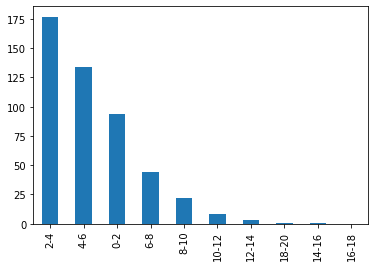

In [34]:
#Not asked for but this is part of my analysis point 2

mdata = data.loc[data['Gender']=='Male']
fdata = data.loc[data['Gender']=='Female']
mpurchases = mdata.groupby('SN').sum()
fpurchases = fdata.groupby('SN').sum()


pbins = [0,2,4,6,8,10,12,14,16,18,20]
pbin_names = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20']

mpurchases["Spender"] = pd.cut(mpurchases["Price"], pbins, labels=pbin_names, include_lowest=True)
fpurchases["Spender"] = pd.cut(fpurchases["Price"], pbins, labels=pbin_names, include_lowest=True)


mpurchases['Spender'].value_counts().plot(kind = "bar")
